# Wisconsin Breast Cancer - Loading dataset, EDA & split into train, validation and test sets

## Importing libraries

In [1]:
import sys
sys.path.append('../') 
from imports import *

## Loading dataset

In [2]:
# Load dataset
data = load_breast_cancer()

# Getting pandas df, columns with feature names for better understanding
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## EDA: Exploratory Data analysis

### Missing values

In [4]:
# No missing values
df.isna().sum().sum()

0

### Class imbalance

In [5]:
# Not much class imbalance
df.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [6]:
# Count the occurrences of each class (1 and 0)
class_counts = df['target'].value_counts()
class_percentages = class_counts / len(df) * 100

# print(f"Class Percentages: {class_percentages:.2f}")
for class_label, percentage in class_percentages.items():
    print(f"Class {class_label}: {percentage:.2f}%")

Class 1: 62.74%
Class 0: 37.26%


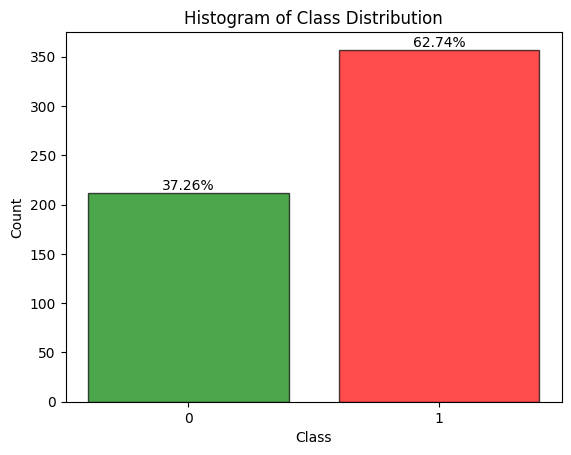

In [7]:
# Plotting histogram with different colors for each class
plt.bar(0, class_counts[0], color='green', edgecolor='black', alpha=0.7)
plt.bar(1, class_counts[1], color='red', edgecolor='black', alpha=0.7)
plt.xticks([0, 1])
plt.title('Histogram of Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotating the histogram with class percentages
plt.text(0, class_counts[0], f'{class_percentages[0]:.2f}%', ha='center', va='bottom')
plt.text(1, class_counts[1], f'{class_percentages[1]:.2f}%', ha='center', va='bottom')

plt.show()

### Correlation matrix

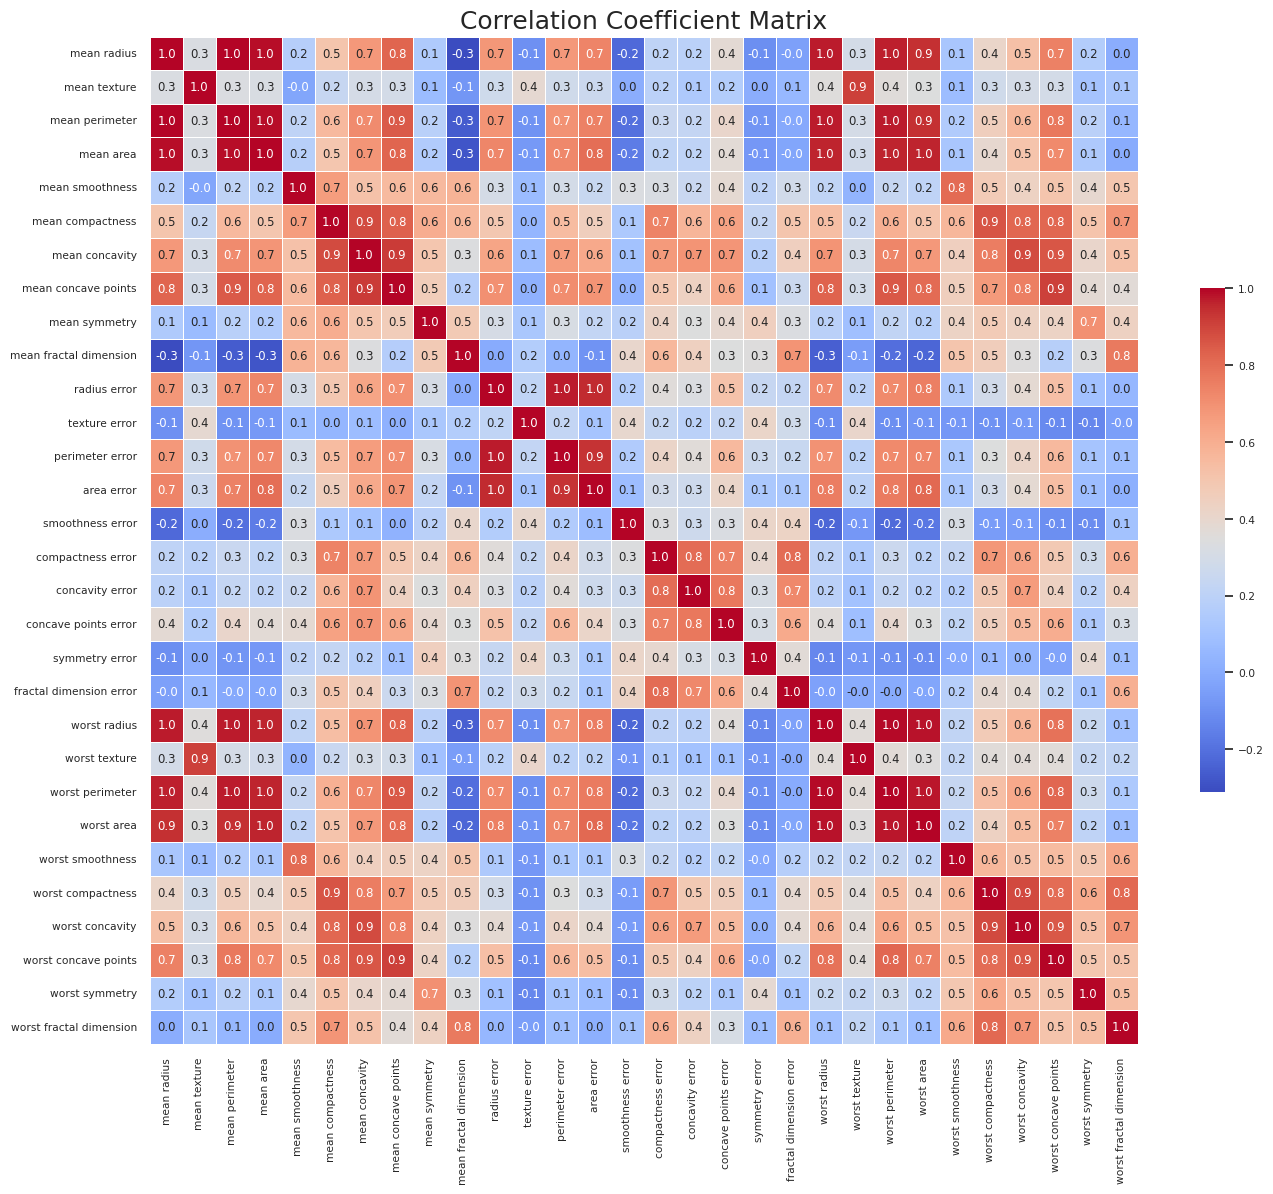

In [8]:
correlation_matrix = df.corr()

# Drop the 'target' column and row from the correlation matrix if it exists
if 'target' in correlation_matrix:
    correlation_matrix.drop('target', axis=0, inplace=True)
    correlation_matrix.drop('target', axis=1, inplace=True)
    
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with smaller annotations
sns.set(font_scale=0.7)  # Adjust to appropriate font scale
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm',
                 linewidths=.5, cbar_kws={"shrink": .5})

# Title
ax.set_title('Correlation Coefficient Matrix', fontsize=18)

# Improving the layout to prevent cutting off of tick labels on the edges
plt.tight_layout()

# Show the plot
plt.show()


# Splitting into train/val/test sets

In [9]:
# Select X (data) and y (target)
X = df.drop('target', axis=1)
y = df['target']

In [10]:
# Split the data into training and testing sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training set only
X_train_temp = scaler.fit_transform(X_train_temp)
X_train_temp = pd.DataFrame(X_train_temp, columns=X.columns)

# Apply transform to the test set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Get training and validation set also
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=1, stratify=y_train_temp)

In [11]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(target
 1    228
 0    136
 Name: count, dtype: int64,
 target
 1    57
 0    34
 Name: count, dtype: int64,
 target
 1    72
 0    42
 Name: count, dtype: int64)

In [12]:
# checking if the distribution of classes (0, 1) is same across the train, val, test sets
# Counts for y_train, y_val, y_test
train_counts = y_train.value_counts(normalize=True) * 100
val_counts = y_val.value_counts(normalize=True) * 100
test_counts = y_test.value_counts(normalize=True) * 100

# Creating formatted strings using list comprehension and then joining them
train_distribution_str = "\n".join([f"  Class {label}: {percent:.2f}%" for label, percent in train_counts.items()])
val_distribution_str = "\n".join([f"  Class {label}: {percent:.2f}%" for label, percent in val_counts.items()])
test_distribution_str = "\n".join([f"  Class {label}: {percent:.2f}%" for label, percent in test_counts.items()])

# Printing the distributions
print(f"Class distribution in y_train:\n{train_distribution_str}")
print(f"\nClass distribution in y_val:\n{val_distribution_str}")
print(f"\nClass distribution in y_test:\n{test_distribution_str}")



Class distribution in y_train:
  Class 1: 62.64%
  Class 0: 37.36%

Class distribution in y_val:
  Class 1: 62.64%
  Class 0: 37.36%

Class distribution in y_test:
  Class 1: 63.16%
  Class 0: 36.84%


# Saving datasets to be used later for analysis and reproducibility

In [13]:
X_train.to_csv('./breast-cancer-processed-data/X_train.csv', index=False)
y_train.to_csv('./breast-cancer-processed-data/y_train.csv', index=False)
X_val.to_csv('./breast-cancer-processed-data/X_val.csv', index=False)
y_val.to_csv('./breast-cancer-processed-data/y_val.csv', index=False)
X_test.to_csv('./breast-cancer-processed-data/X_test.csv', index=False)
y_test.to_csv('./breast-cancer-processed-data/y_test.csv', index=False)
